## Linear classificator

### Imports

In [23]:
from sklearn.svm import LinearSVC, SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

### Processing dataset

In [3]:
iris = datasets.load_iris()
features = iris.data[:100, :2]
target = iris.target[:100]
features[:5], target[:5]

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6]]),
 array([0, 0, 0, 0, 0]))

In [5]:
scaler = StandardScaler()
features_standartized = scaler.fit_transform(features)
features_standartized[:5]

array([[-0.5810659 ,  0.84183714],
       [-0.89430898, -0.2078351 ],
       [-1.20755205,  0.21203379],
       [-1.36417359,  0.00209934],
       [-0.73768744,  1.05177159]])

### Linear classification of Iris data

In [6]:
svc = LinearSVC(C=1.0)
model = svc.fit(features_standartized, target)

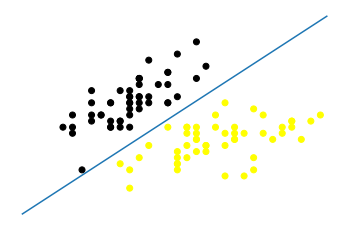

In [12]:
color = ['black' if c == 0 else 'yellow' for c in target]
plt.scatter(features_standartized[:, 0], features_standartized[:, 1], c=color)
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]
plt.plot(xx, yy)
plt.axis('off')
plt.show()

In [18]:
new_observation = [[-20, -30]]
svc.predict(new_observation)

array([1])

## Processing of linearly inseparable classes with kernels

In [55]:
np.random.seed(0)
features = np.random.randn(200, 2)
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

In [31]:
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(('red', 'blue'))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker='+', label=cl)

In [71]:
svc_linear = SVC(kernel='linear', random_state=0, C=1)
svc_linear.fit(features, target)
svc_linear

SVC(C=1, kernel='linear', random_state=0)

In [90]:
svc_poly = SVC(kernel='poly', degree=2, C=1)
svc_poly.fit(features, target)
svc_poly

SVC(C=1, degree=2, kernel='poly')

In [91]:
svc = SVC(kernel="rbf", random_state=0, gamma=10, C=2)
model = svc.fit(features, target)
model

SVC(C=2, gamma=10, random_state=0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


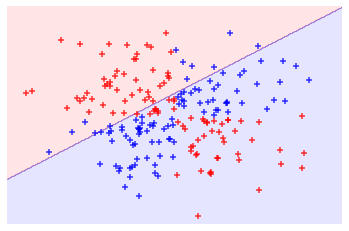

In [92]:
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis('off')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


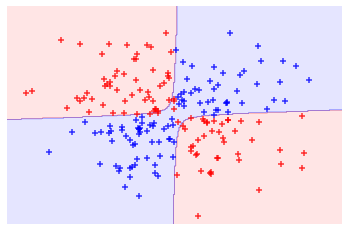

In [93]:
plot_decision_regions(features, target, classifier=svc_poly)
plt.axis('off')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


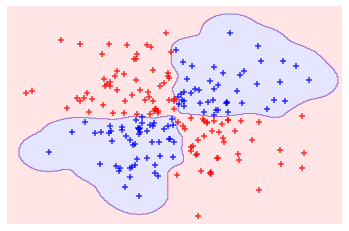

In [94]:
plot_decision_regions(features, target, classifier=svc)
plt.axis('off')
plt.show()